### Задание. <br>
1) Повернуть изображение на 90 градусов при помощи аффинных преобразований
2) Вырезать область изображения (биллборд)
3) Произвести upscale изображения
4) Найти и отрисовать контуры изображения

In [15]:
import cv2
from matplotlib import pyplot as plt
%matplotlib inline

def imgshow(image):
    plt.imshow(image)
    plt.xticks([])
    plt.yticks([])
    plt.axis("off")
    plt.show();

Импортируем изображение:

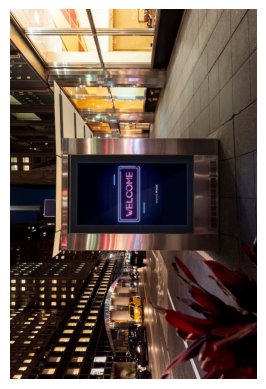

In [16]:
# Импортируем исходную картинку
img = cv2.cvtColor(cv2.imread('pictures/billboard.jpg'), cv2.COLOR_BGR2RGB)
imgshow(img)

Перевернем картинку на 90 градусов при помощи функции cv.warpAffine():

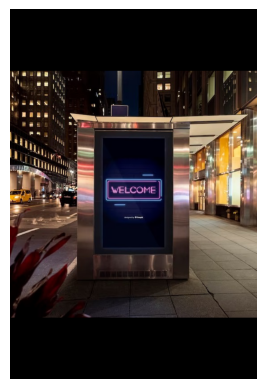

In [17]:
# Находим разрешение изображения, его центр
(h, w) = img.shape[:2]
(cX, cY) = (w // 2, h // 2)

# Поворачиваем изображение на 90 градусов
M = cv2.getRotationMatrix2D((cX, cY), -90, 1.0)
rotated = cv2.warpAffine(img, M, (w, h))
imgshow(rotated)

Выделим область биллборда в прямоугольник:

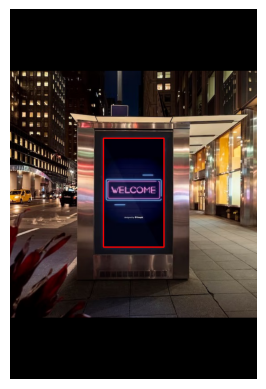

In [18]:
img = rotated
selected = cv2.rectangle(img, (208, 288), (343, 531), (255, 0, 0), 2)
plt.axis('off');
imgshow(selected)

Вырежем область изображения:

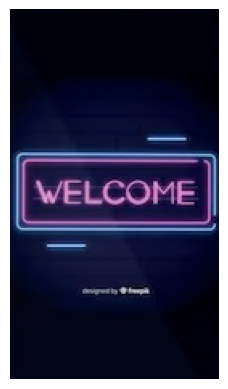

In [19]:
img = rotated
# Задаем параметры
width, height = 130, 230
x, y = 210, 290
# Обрезаем картинку
crop_img = img[y:y+height, x:x+width]

plt.axis('off');
plt.imshow(crop_img);

Проведем апскейл изображения, для этого воспользуемся моделью FSRCNN_x4, считав ее при помощи функции [cv2.dnn_superres.DnnSuperResImpl_create()](https://www.tutorialspoint.com/opencv_python/opencv_python_image_contours.htm):

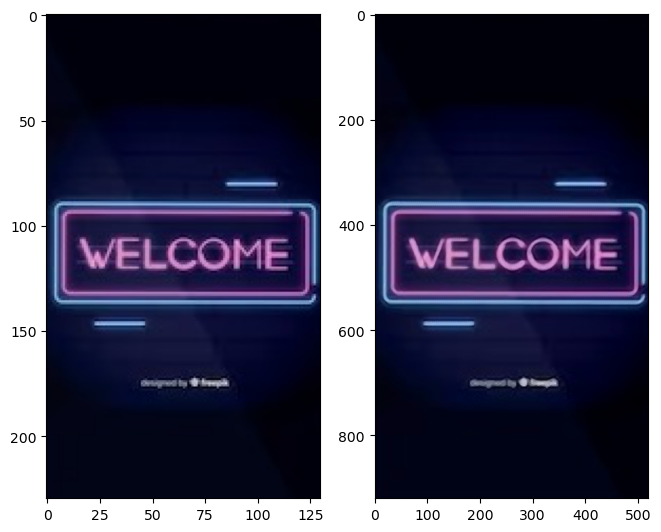

In [20]:
img = crop_img
# Создаем объект superresolution
sr = cv2.dnn_superres.DnnSuperResImpl_create()
path = "pictures/FSRCNN_x4.pb"

# Считываем модель
sr.readModel(path)
sr.setModel("fsrcnn", 4)
# Апскейлим изображение
upscaled = sr.upsample(img)

plt.figure(figsize=(12,8))
plt.subplot(1,3,1)
plt.imshow(img)
plt.subplot(1,3,2)
plt.imshow(upscaled)
plt.show()

Отрисуем контуры изображения. Воспользуемся преобразованием изображения в градации серого, функцией cv2.Canny() находим края изображения, затем при помощи cv2.findContours() и drawContours() отрисуем:

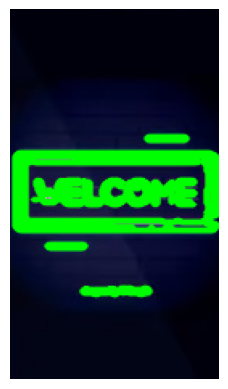

In [21]:
img_copy = upscaled.copy()
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
edges = cv2.Canny(image=img_gray,threshold1=100, threshold2=200)
contours, hierarchy = cv2.findContours(image=edges, mode=cv2.RETR_TREE, method=cv2.CHAIN_APPROX_NONE)
cv2.drawContours(image=img, contours=contours, contourIdx=-1, color=(0, 255, 0), thickness=2, lineType=cv2.LINE_AA)
imgshow(img)